# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [2]:
norm=stats.norm.rvs(1,2,size=500)
print(min(norm))
print(max(norm))
print(np.mean(norm))
print(np.var(norm))
print(stats.kurtosis(norm))
print(stats.skew(norm))

-5.09292696824
7.21114332919
1.13406244293
4.01185641799
0.17274889702417084
-0.2726115585836689


In [3]:
chi2=stats.chi2.rvs(3,size=500)
print(min(chi2))
print(max(chi2))
print(np.mean(chi2))
print(np.var(chi2))
print(stats.kurtosis(chi2))
print(stats.skew(chi2))

0.00531526800844
13.5016505092
2.82953475621
5.48456805462
2.4527267047110763
1.477282471098847


In [4]:
pois=stats.poisson.rvs(10,size=500)
print(min(pois))
print(max(pois))
print(np.mean(pois))
print(np.var(pois))
print(stats.kurtosis(pois))
print(stats.skew(pois))

2
21
9.85
9.8915
0.07754105762326935
0.3393350935155049


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

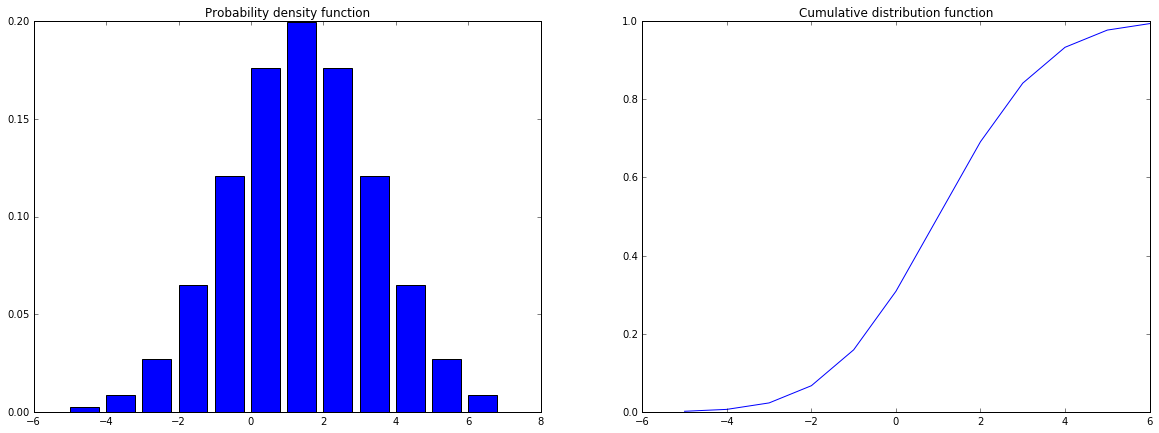

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
x = np.arange(-5, 7)
normd = stats.norm.pdf(x,1,2)
normc = stats.norm.cdf(x, 1,2)
ax[0].bar(x,normd)
ax[1].plot(x, normc)

ax[0].set_title(u'Probability density function')
ax[1].set_title(u'Cumulative distribution function')

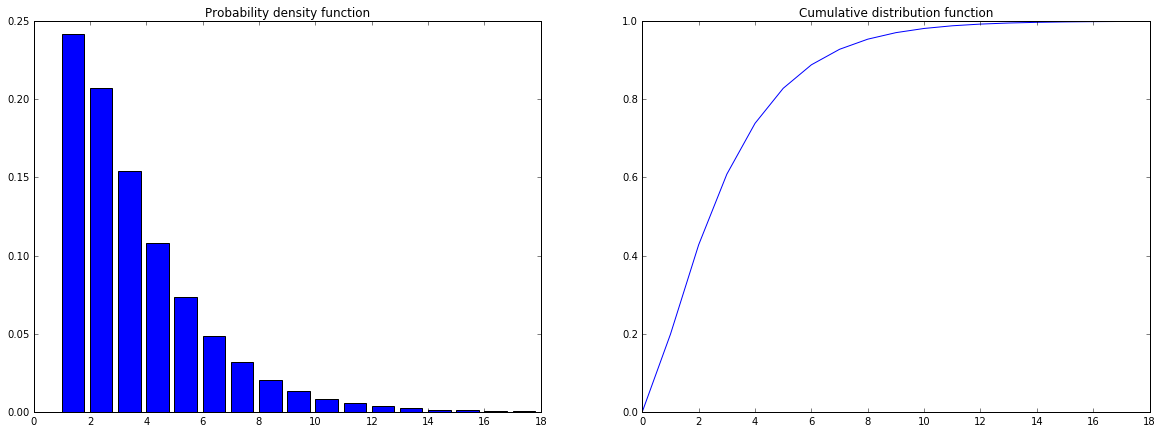

In [6]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
x = np.arange(0, 18)
chi2d = stats.chi2.pdf(x,3)
chi2c = stats.chi2.cdf(x,3)
ax[0].bar(x,chi2d)
ax[1].plot(x, chi2c)

ax[0].set_title(u'Probability density function')
ax[1].set_title(u'Cumulative distribution function')

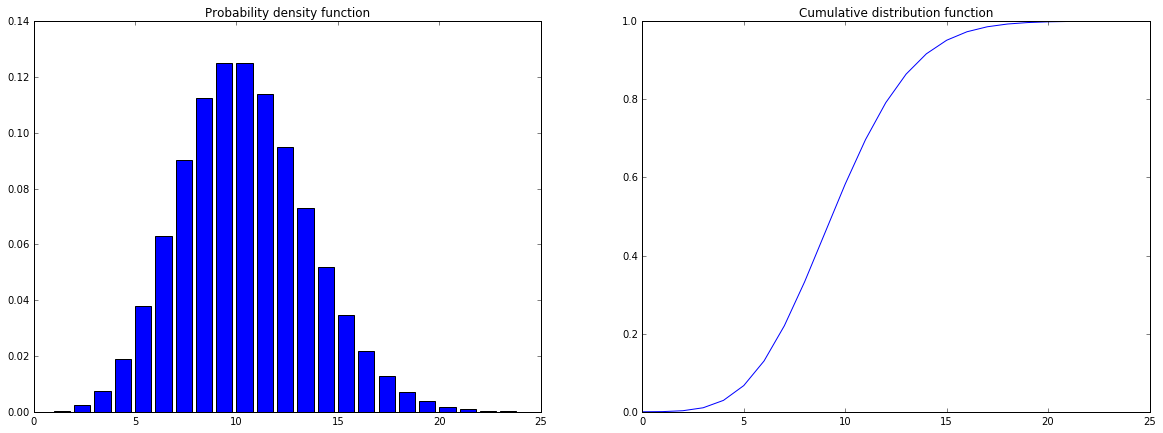

In [7]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,7)
x = np.arange(0, 25)
poisd = stats.poisson.pmf(x,10)
poisc = stats.poisson.cdf(x,10)
ax[0].bar(x,poisd)
ax[1].plot(x, poisc)

ax[0].set_title(u'Probability density function')
ax[1].set_title(u'Cumulative distribution function')

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [8]:
stats.describe(norm)

DescribeResult(nobs=500, minmax=(-5.0929269682407678, 7.2111433291924651), mean=1.1340624429251982, variance=4.0198962104105327, skewness=-0.2726115585836689, kurtosis=0.17274889702417084)

In [9]:
stats.describe(chi2)

DescribeResult(nobs=500, minmax=(0.0053152680084351603, 13.501650509153151), mean=2.8295347562102013, variance=5.4955591729633344, skewness=1.477282471098847, kurtosis=2.4527267047110763)

In [10]:
stats.describe(pois)

DescribeResult(nobs=500, minmax=(2, 21), mean=9.8499999999999996, variance=9.911322645290582, skewness=0.3393350935155049, kurtosis=0.07754105762326935)

## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

In [11]:
import pandas as pd

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [15]:
df = pd.read_csv('../../minor-ida-16/data/beauty.csv',sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [16]:
Corr=pd.DataFrame.corr(df)
Corr

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


In [21]:
L=[]
K=[]
for i in Corr.columns.values:
     L.append(abs(Corr[i]))
L=np.sort(L)
for i in range(10):
    K.append(sorted(L[i])[8]) #Первое значение будет равно 1, поэтому его пропукаем
    K.append(sorted(L[i])[7])
    K.append(sorted(L[i])[6])
K=sorted(K)
M=[K[len(K)-1],K[len(K)-3],K[len(K)-5]] #Так как матрица симметричная, значения попарно будут равны
M

[0.31922793439835251, 0.31341944158696911, 0.30162847441179352]

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

(1.0199999996628959, 5.2866893329296314)

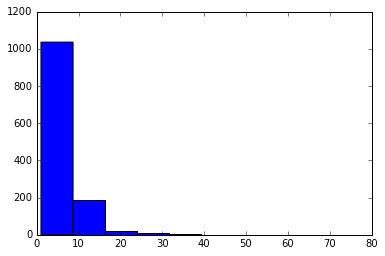

In [18]:
plt.hist(df.wage) #Распределение похоже на экспоненциальное
wage_params = stats.expon.fit(df.wage)
wage_params

(4.1541539090657587, -0.49492382022819947, 4.5018244141899446)

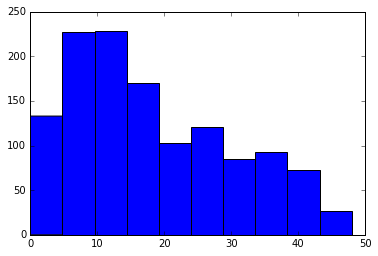

In [20]:
plt.hist(df.exper)
exper_params = stats.chi2.fit(df.exper)
exper_params

(12.563492063492063, 2.6234474826802723)

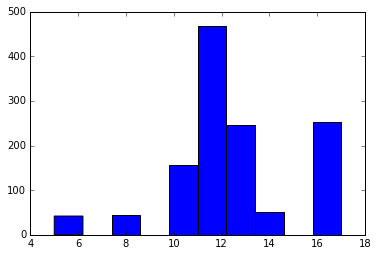

In [22]:
plt.hist(df.educ)
educ_params = stats.norm.fit(df.educ)
educ_params

(3.1857142857142855, 0.68460558517750636)

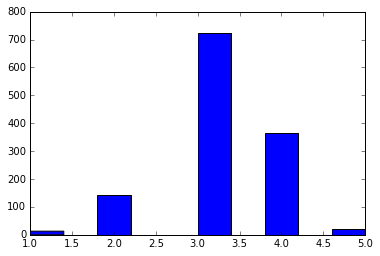

In [23]:
plt.hist(df.looks)
looks_params = stats.norm.fit(df.looks)
looks_params

131/180
49/180


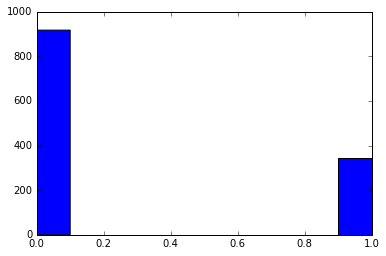

In [64]:
import sympy
plt.hist(df.union)
pu = sympy.Symbol('pu')
pu=sympy.solve(df.groupby('union').size()[0]/pu-df.groupby('union').size()[1]/(1-pu),pu)
print(pu[0])
print(1-pu[0])


1/15
14/15


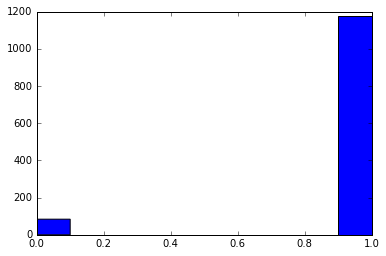

In [65]:
plt.hist(df.goodhlth)
pg = sympy.Symbol('pg')
pg=sympy.solve(df.groupby('goodhlth').size()[0]/pg-df.groupby('goodhlth').size()[1]/(1-pg),pg)
print(pg[0])
print(1-pg[0])

389/420
31/420


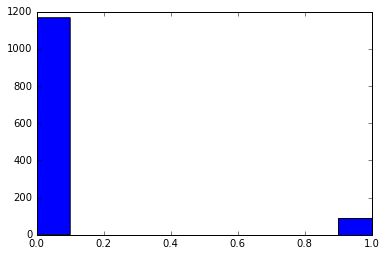

In [66]:
plt.hist(df.black)
pb = sympy.Symbol('pb')
pb=sympy.solve(df.groupby('black').size()[0]/pb-df.groupby('black').size()[1]/(1-pb),pb)
print(pb[0])
print(1-pb[0])

206/315
109/315


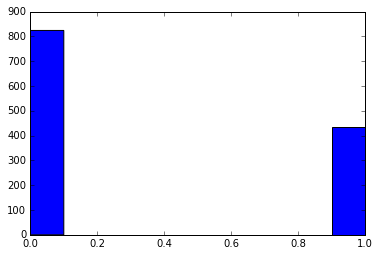

In [67]:
plt.hist(df.female)
pf = sympy.Symbol('pf')
pf=sympy.solve(df.groupby('female').size()[0]/pf-df.groupby('female').size()[1]/(1-pf),pf)
print(pf[0])
print(1-pf[0])

389/1260
871/1260


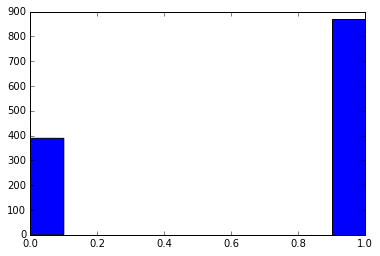

In [68]:
plt.hist(df.married)
pm = sympy.Symbol('pm')
pm=sympy.solve(df.groupby('married').size()[0]/pm-df.groupby('married').size()[1]/(1-pm),pm)
print(pm[0])
print(1-pm[0])

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [23]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
text_all = fetch_20newsgroups(subset = "all", 
categories = ["soc.religion.christian","talk.politics.guns"], 
random_state = 50)

In [44]:
text_train, text_test, y_train, y_test = train_test_split(text_all.data, text_all.target, test_size = 0.3, random_state = 50)

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [53]:
text = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
text.fit(text_all)
X_train = text.transform(text_train).toarray()
X_test =text.transform(text_test).toarray()

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [54]:
X_train=text

(1334, 6)

**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [ ]:
## Your code here

**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [ ]:
## Your code here